<a href="https://colab.research.google.com/github/amta02-wq/Source-Code-Prediksi-Harga-Rumah--/blob/main/Source_Code_Prediksi_Harga_Rumah_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔹 Tahap Cleaning Data...
Jumlah data setelah cleaning: 1010

🔹 5 Data Awal:
   NO                                         NAMA RUMAH       HARGA   LB  \
0   1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...  3800000000  220   
1   2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...  4600000000  180   
2   3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...  3000000000  267   
3   4           Rumah Baru Tebet, Tebet, Jakarta Selatan   430000000   40   
4   5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...  9000000000  400   

    LT  KT  KM  GRS  
0  220   3   3    0  
1  137   4   3    2  
2  250   4   4    4  
3   25   2   2    0  
4  355   6   5    3  

🔹 5 Data Akhir:
        NO                                         NAMA RUMAH        HARGA  \
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   

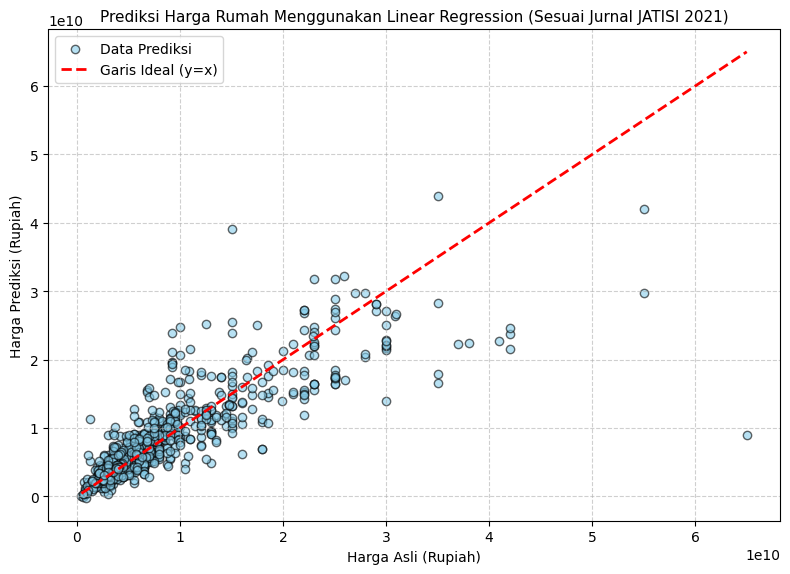

In [3]:
# ==============================================================
#  PREDIKSI HARGA RUMAH MENGGUNAKAN LINEAR REGRESSION
# ==============================================================

%pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 1. BACA DATASET ==========
data = pd.read_excel("/content/sample_data/DATA RUMAH.xlsx")

# --- PREPROCESSING SESUAI JURNAL ---
print("\n🔹 Tahap Cleaning Data...")
data = data.drop_duplicates()                       # hapus data duplikat
data = data.dropna()                                # hapus data kosong
data = data[data["HARGA"] > 0]                      # hapus data dengan harga = 0
print(f"Jumlah data setelah cleaning: {len(data)}")

# Tampilkan contoh data
print("\n🔹 5 Data Awal:")
print(data.head())
print("\n🔹 5 Data Akhir:")
print(data.tail())

# ========== 2. SIAPKAN FITUR DAN TARGET ==========
fitur = ["LT", "LB", "KT", "KM", "GRS"]
target = "HARGA"

X = data[fitur].values
y = data[target].values

# ========== 3. HITUNG MODEL REGRESI DARI PERSAMAAN NORMAL ==========
# Persamaan umum: W = (X^T X)^(-1) X^T y
X_b = np.c_[np.ones((X.shape[0], 1)), X]
XtX = X_b.T @ X_b
XtY = X_b.T @ y
W = np.linalg.inv(XtX) @ XtY

# Cetak hasil koefisien regresi
print("\n===================================================")
print("🔹 HASIL PERHITUNGAN KOEFISIEN REGRESI LINEAR")
print("===================================================")
print(f"Intercept (β0) : {W[0]:.6f}")
for i, f in enumerate(fitur):
    print(f"{f:10s} (β{i+1}) : {W[i+1]:.6f}")

# ========== 4. PREDIKSI DAN UJI MODEL ==========
y_pred = X_b @ W

# Korelasi antar variabel independen & dependen (r)
print("\n===================================================")
print("🔹 UJI KORELASI (r) antar variabel")
print("===================================================")
corr_matrix = data[fitur + [target]].corr()
print(corr_matrix)

# ========== 5. KOEFISIEN DETERMINASI (R²) ==========
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)
r = np.sqrt(r2)

print("\n===================================================")
print("🔹 KOEFISIEN DETERMINASI (R²) & KORELASI (r)")
print("===================================================")
print(f"r  : {r:.6f}")
print(f"R² : {r2:.6f}  --> Akurasi Model ≈ {r2*100:.2f}%")

# ========== 6. NILAI RMSE ==========
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print("\n===================================================")
print("🔹 NILAI GALAT (RMSE)")
print("===================================================")
print(f"RMSE : {rmse:,.2f} Rupiah")

# ========== 7. VISUALISASI ==========
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6, color='skyblue', edgecolor='k', label='Data Prediksi')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Garis Ideal (y=x)')
plt.title("Prediksi Harga Rumah Menggunakan Linear Regression (Sesuai Jurnal JATISI 2021)", fontsize=11)
plt.xlabel("Harga Asli (Rupiah)")
plt.ylabel("Harga Prediksi (Rupiah)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
# ==============================================================
#  INPUT MANUAL UNTUK PREDIKSI RUMAH BARU
# ==============================================================

print("\n===================================================")
print("🔹 PREDIKSI HARGA RUMAH BARU (INPUT MANUAL)")
print("===================================================")

LT = float(input("Masukkan Luas Tanah (m²): "))
LB = float(input("Masukkan Luas Bangunan (m²): "))
KT = int(input("Masukkan Jumlah Kamar Tidur: "))
KM = int(input("Masukkan Jumlah Kamar Mandi: "))
GRS = int(input("Masukkan Jumlah Garasi: "))

# Buat array rumah baru
rumah_baru = np.array([[1, LT, LB, KT, KM, GRS]])
prediksi = rumah_baru.dot(W)[0]

# Cari data terdekat di dataset
jarak = np.linalg.norm(X - np.array([LT, LB, KT, KM, GRS]), axis=1)
idx_terdekat = np.argmin(jarak)
harga_asli = y[idx_terdekat]

selisih = abs(prediksi - harga_asli)
persent_error = (selisih / harga_asli) * 100
akurasi = 100 - persent_error

# Tampilkan hasil
print("\n===================================================")
print("🔹 HASIL PREDIKSI RUMAH BARU")
print("===================================================")
print(f"Luas Tanah  : {LT}")
print(f"Luas Bangunan: {LB}")
print(f"Kamar Tidur : {KT}")
print(f"Kamar Mandi : {KM}")
print(f"Garasi      : {GRS}")
print("---------------------------------------------------")
print(f"Prediksi Harga Rumah : Rp {prediksi:,.2f}")
print(f"Harga Asli Terdekat  : Rp {harga_asli:,.2f}")
print(f"Selisih              : Rp {selisih:,.2f}")
print(f"Persentase Error     : {persent_error:.2f}%")
print(f"Akurasi Prediksi     : {akurasi:.2f}%")
print("===================================================")



🔹 PREDIKSI HARGA RUMAH BARU (INPUT MANUAL)
Masukkan Luas Tanah (m²): 390
Masukkan Luas Bangunan (m²): 140
Masukkan Jumlah Kamar Tidur: 4
Masukkan Jumlah Kamar Mandi: 2
Masukkan Jumlah Garasi: 2

🔹 HASIL PREDIKSI RUMAH BARU
Luas Tanah  : 390.0
Luas Bangunan: 140.0
Kamar Tidur : 4
Kamar Mandi : 2
Garasi      : 2
---------------------------------------------------
Prediksi Harga Rumah : Rp 9,262,790,409.22
Harga Asli Terdekat  : Rp 3,600,000,000.00
Selisih              : Rp 5,662,790,409.22
Persentase Error     : 157.30%
Akurasi Prediksi     : -57.30%
